Preparatory: 16.9

In [1]:
!conda install pandas-profiling -y

Solving environment: done

# All requested packages already installed.



In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Background of Data Set

Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who

About this file
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Q1) Try to model the result of a coin toss. In your model, include any features that you think important in explaining the result. Discuss with your mentor about the pros and cons of adding too many features into your model.

A1) Assume fairness--even sides.
a) look at the surface friction/slipperyness
b) Depends on height of drop/toss.
c) angle of the toss.
d) Humidity in the air.

Cons: Including more features means we have to conduct more experment trials. Because, we need to determine the values for each factors and the more factors we have the more unknowns to determine. 
Pro: Great to account for all scenarios and plan. 
But, we should narrow down to only the most relevant factors into the model. 

Q2) If you ever used Netflix, you should already have realized that it provides some recommendations for you to watch. In data science, this is an example of the so-called recommendations systems. Read this nontechnical blog post of Netflix about how they model their recommendations systems. Then, derive the features they use in their recommendations engines and discuss what else can be incorporated into this model.

A2) They identify titles' 'genre' , 'actor', 'year released'. Rows also include those trending relative to previously selected. Viewing duration, device type used, time of day, person's interactions with Netflix's service (such as the viewing history and how that person rated other titles).

Also they compare with other members exhibiting similar tastes and preferences on Netflix service.

Perhaps they could also use the IP address so that Recommendations knows which country, city viewer is watching from.

Netflix Article: https://help.netflix.com/en/node/100639

# Challenge 16.10

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Step 1: Load Dataset
'Life expectancy' is our target variable. 

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Step 2: Exploratory Data Analysis - Data Cleaning
Detect the problems with the data such as missing values and outliers. 
a) Are there any nonsense values that seem to be stemmed from the data collection? 
b) For the missing values, discuss which technique would be the most suitable one in filling out these values. 
c) Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [6]:
ProfileReport(life_df)

Number of variables,22
Number of observations,2938
Total Missing (%),3.9%
Total size in memory,505.1 KiB
Average record size in memory,176.0 B
Numeric,18
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [7]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

We have 22 columns. We have 2,938 observations, but missing values in several columns. Let's look for unique values.

In [8]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

## Column Descriptions 
(Aside from 'Country' and 'status', which are probably categoricol, data types are continuous and integers)

Country = Country
Year = Year
Status= Developed or Developing status
Life expectancy = Life Expectancy in age
Adult Mortality = Adult Mortality Rates of both sexes (probability of dying between 15& 60 years per 1000 population)
infant deaths = Number of Infant Deaths per 1000 population
Alcohol = Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) percentage 
expenditure = Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis B = Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
Measles = Measles - number of reported cases per 1000 population
BMIAverage =  Body Mass Index of entire population 
under-five deaths = Number of under-five deaths per 1000 population
Polio = Polio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditure = General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria = Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS = Deaths per 1 000 live births HIV/AIDS (0-4 years)
GDP = Gross Domestic Product per capita (in USD)
Population = Population of the country
thinness 1-19 years = Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 years = Prevalence of thinness among children for Age 5 to 9(%)
Income composition of resources = HDI in terms of income composition of resources (index ranging from 0 to 1)
Schooling = Number of years of Schooling(years)

### a) Observations
*No text data
*Looks like Measles is the most prevalent of diseases (Hepatitis, Polio, Diphtheria, AIDS)
*Hepatitis B is the most "missing value' category (if 20ish% missing, check distribution to see if 'RANDOM'/by accident or regional bias, or other underlying cause 
*

* Missing values for:
Life expectancy                    2928 non-null float64 --only 10 missing values, will skip or REMOVE the 10 rows 
Adult Mortality                    2928 non-null float64 -- same
Alcohol                            2744 non-null float64 --impute mean
Hepatitis B                        2385 non-null float64 --interpolate
 BMI                               2904 non-null float64 --interpolate
 Polio                             2919 non-null float64 --interpolate
Total expenditure                  2712 non-null float64 --impute median(look at profile above for distr of data)
Diphtheria                         2919 non-null float64 --interpolate
GDP                                2490 non-null float64 --impute
Population                         2286 non-null float64 --impute median
 thinness  1-19 years              2904 non-null float64 --impute median
 thinness 5-9 years                2904 non-null float64 --impute median
Income composition of resources    2771 non-null float64 --impute mean
Schooling                          2775 non-null float64 --impute mean

* Don't see any 'True' after running null values test.


In [9]:
boolean_mask = life_df["Hepatitis B"].isnull()
boolean_mask.value_counts()

False    2385
True      553
Name: Hepatitis B, dtype: int64

In [10]:
life_df[boolean_mask]["Country"].value_counts().index

Index(['Switzerland', 'Iceland', 'Finland',
       'United Kingdom of Great Britain and Northern Ireland', 'Japan',
       'Hungary', 'Slovenia', 'Denmark', 'Norway', 'South Sudan',
       'Equatorial Guinea', 'Haiti', 'Somalia', 'Sweden', 'Netherlands',
       'Namibia', 'Ireland', 'Guinea-Bissau', 'Central African Republic',
       'Niger', 'Timor-Leste', 'Chad', 'Togo', 'Liberia', 'Sierra Leone',
       'Ethiopia', 'Angola', 'Guinea', 'Croatia', 'Congo', 'Djibouti',
       'Democratic Republic of the Congo', 'Cambodia', 'Chile', 'Montenegro',
       'Burkina Faso', 'Suriname', 'Cameroon', 'Sudan', 'Nigeria', 'Zambia',
       'Gabon', 'Mauritania', 'The former Yugoslav republic of Macedonia',
       'Guatemala', 'Estonia', 'Serbia', 'Algeria', 'Senegal',
       'Bosnia and Herzegovina', 'India', 'Burundi', 'Sao Tome and Principe',
       'Viet Nam', 'Lao People's Democratic Republic', 'Myanmar', 'Paraguay',
       'Jamaica', 'Sri Lanka', 'Canada', 'Bangladesh', 'Peru',
       'Democr

In [11]:
life_df.shape

(2938, 22)

In [12]:
#Use function called .isnull() which returns True if an element has no value and otherwise returns (None) 
#or False for each element in a DataFrame.

life_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for column_name in life_df.columns:
    print("Unique values in column {} are: {}".format(column_name, life_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [14]:
#Calculate magnitude of missing values by calculating the percentages of the missing values in all columns:
life_df.isnull().sum()*100/life_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

Checking the columns with 0.00 results to see frequencies of categorical values.


In [15]:
life_df["Life expectancy "]

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [16]:
#Country
life_df.Country.value_counts()


United Arab Emirates     16
Zimbabwe                 16
Costa Rica               16
Kyrgyzstan               16
Cabo Verde               16
                         ..
Niue                      1
Tuvalu                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Name: Country, Length: 193, dtype: int64

In [17]:
#Year
life_df.Year.value_counts()

2013    193
2015    183
2011    183
2009    183
2007    183
2005    183
2003    183
2001    183
2014    183
2012    183
2010    183
2008    183
2006    183
2004    183
2002    183
2000    183
Name: Year, dtype: int64

In [18]:
#Status
life_df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [19]:
#Measles
life_df['Measles '].value_counts()

0         983
1         104
2          68
3          44
4          33
         ... 
124219      1
1359        1
1361        1
9559        1
4088        1
Name: Measles , Length: 958, dtype: int64

In [20]:
#Disease Diphtheria
life_df['Diphtheria '].value_counts()

99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
2.0       1
56.0      1
19.0      1
27.0      1
32.0      1
Name: Diphtheria , Length: 81, dtype: int64

In [23]:
#HIV/AIDS
life_df[' HIV/AIDS’].value_counts()

SyntaxError: EOL while scanning string literal (<ipython-input-23-4273928d6d57>, line 2)

In [ ]:
life_df.columns

b) Fill in missing values by: Imputation or Interpolation (How to decide?)

#Imputation by mean
life_df["Alcohol"].fillna(life_df["Alcohol"].mean(), inplace=True)
life_df["Income composition of resources"].fillna(life_df["Income composition of resources"].mean(), inplace=True)
life_df["Schooling"].fillna(life_df["Schooling"].mean(), inplace=True)
print(life_df['Alcohol'])
print(life_df['Income composition of resources'])
print(life_df[‘Schooling'])

#Imputation by median
life_df["Population"].fillna(life_df["Population"].median(), inplace=True)
print(life_df[‘Population'])

#Interpolate disease variables: 'Hepatitis B', "Measles ", "Polio", "Diphtheria", ' HIV/AIDS' 

In [24]:
from scipy.interpolate import interp1d
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
for hepatitis in 'Hepatitis B':
    life_df.loc[life_df["Hepatitis B"] == hepatitis, fill_list] = life_df.loc[life_df["Hepatitis B"] == hepatitis, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['Hepatitis B’])


SyntaxError: EOL while scanning string literal (<ipython-input-24-adcde3a29e01>, line 13)

In [25]:
for measle in 'Measles ':
    life_df.loc[life_df["Measles "] == measle, fill_list] = life_df.loc[life_df["Measles "] == measle, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['Measles ‘])

SyntaxError: EOL while scanning string literal (<ipython-input-25-24ab3ef6ac0a>, line 6)

In [26]:
for p in 'Polio':
    life_df.loc[life_df['Polio'] == p, fill_list] = life_df.loc[life_df['Polio'] == p, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df[‘Polio'])

SyntaxError: invalid character in identifier (<ipython-input-26-75715d86ce9f>, line 6)

In [27]:
for hiv in ' HIV/AIDS':
    life_df.loc[life_df[' HIV/AIDS'] == hiv, fill_list] = life_df.loc[life_df[' HIV/AIDS'] == hiv, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df[' HIV/AIDS’])

SyntaxError: EOL while scanning string literal (<ipython-input-27-43ef10a49d96>, line 6)

## Problematic Keys
HIV/AIDS
    life_df.HIV/AIDS.value_counts()
percentage expenditure
    life_df.percentage expenditure.value_counts()
infant deaths
    life_df.infant deaths.value_counts()

#Categorize Exercise: def categorize_video_views(views_num):
    if views_num >= 1000000000:
        return 1
    elif views_num >= 100000000:
        return 2
    else:
        return 3

# we use Pandas' .apply() method by calling the function above.
youtube_df['views_group'] = youtube_df['Video views'].apply(categorize_video_views)

# let's see how many observations we have in each group
print(youtube_df.groupby("views_group")["Video views"].count())

b) Fill in missing values by: Imputation or Interpolation (How to decide?)

### c) Outliers
Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

We will use Boxplot to detect outliers. 

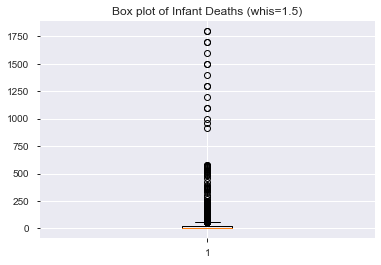

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(life_df["infant deaths"])
plt.title("Box plot of Infant Deaths (whis=1.5)")
plt.show()

In [29]:
#IQR
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
import numpy as np

q75, q25 = np.percentile(life_df["infant deaths"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The death threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_df["infant deaths"] > max_val) 
                      | (life_df["infant deaths"] < min_val))[0]))
    ))

The death threshold is: 1.0
Number of outliers is: 419
The death threshold is: 1.5
Number of outliers is: 315
The death threshold is: 2.0
Number of outliers is: 226
The death threshold is: 2.5
Number of outliers is: 187
The death threshold is: 3.0
Number of outliers is: 158
The death threshold is: 3.5
Number of outliers is: 138
The death threshold is: 4.0
Number of outliers is: 130
The death threshold is: 4.5
Number of outliers is: 121


### Outlier Treatment: 
We have 3 options: 
1) We can drop the outliers from our dataset.
2) We can cap the values of the outliers by assigning them new values.
3) We can transform the outliers into something harmless for our analysis.

In [30]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_infant = winsorize(life_df["infant deaths"], (0, 0.10))

winsorized_infant

masked_array(data=[58, 58, 58, ..., 25, 25, 24],
             mask=False,
       fill_value=999999)

## Step 3: Exploratory Data Analysis - Data
Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.





A) Our target variable is Life Expectancy 'Life expectancy '. 
B) We are showing univariate analysis below. We showed multivariate analysis above in the profile and again below our correlation using '.corr' function.

In [31]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [32]:
life_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


## Step 4: Exploratory Data Analysis - Feature Engineering
In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

After multivariate analysis, we will select the following that we think are relevant to 'Life expectancy': 
1)'Country', 2)'Year', 3)'Status', 4)'Adult Mortality', 5) 'under-five deaths', 6)'Alcohol', 7)'percentage expenditure', 8) 'Hepatitis B',9) 'Measles ', 10)' BMI ', 11)'Polio', 12) 'Total expenditure', 13)'Diphtheria ', ' 14) HIV/AIDS', 15)'GDP', 16)'Population', 17) 'thinness  1-19 years',18) 'Income composition of resources', 
19) 'Schooling'


We see that 'thinness  1-19 years' shows a moderately high correlation with 'BMI' of -.511. We'll keep this variable, but exclude the 'thinness 5-9 years' because it's highly correlated with 'thinness  1-19 years' variable. 

We will select 'under-five deaths' instead of using 'infant deaths'--which we will exclude-- to represent the infant/toddler mortality rates together.

## Step 5: Summarize
a) Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. 
b) Develop visual. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

Resource: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

Summary: 
Overall, the data set presents a robust set of values--most columns included complete values. Although 'Population' presented the most missing values (about 22 percent), and we used the mean value to fill in the missing values, we see that the correlation of 'Population' and 'Life expectancy' is neutral. That being said, we observe four big picture data points. First, we see in Figure 1 that the 'Status' of a country--whether its 'Developing' or 'Developed'--the percentage of expenditure is higher in the latter group.  Second, we see in Figure 2 that 'Life expectancy' increases with the percent of government expenditure on its people's welfare. There's a positive correlation between the two variables of .38.  Third, we see that the diseases ('Alcohol', 'Hepatitis B', 'Measles ','Polio', 'Diphtheria'  and 'HIV/AIDS') show a moderate correlation with 'Life expectancy', or the number of years one lives in a given country. Interestingly enough, 'HIV/AIDS shows the highest correlation of .59 with 'Life expectancy', which is the most modern disease to plague society. I'm curious to see the correlation of Novel COVID-19 in upcoming WHO data. Fourth, we see in Figure 4 (Life Expectancy Per Country) that a 'Developing' country like, Afghanistan or Coite d'oivre, has a lower life expectancy range than the 'Developed' country, like Kuwait or Qatar, which range between 73.2-74.7 and 76.3-78.6 respectively.. Next time, I would like to break the countries into groups by 'Status' to show the state of development's interaction with 'Life expectancy', or the number of years one lives in a given country.  

### b) Visual
Interested in measuring categorical variable against continous: 'Status' vs. 'percentage expenditure’.

### 1. Categorical with Continuous: "Country Status Versus Percentage of Country's Government Expenditure"

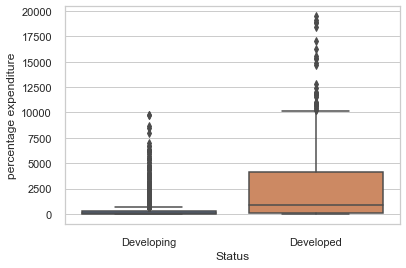

In [33]:
import seaborn as sns
#life_df=data

sns.set(style="whitegrid")
ax = sns.boxplot(x="Status", y="percentage expenditure", data=life_df)

### 2. Continous vs Continous: "Percent of Government Expenditure For Life Expectancy"

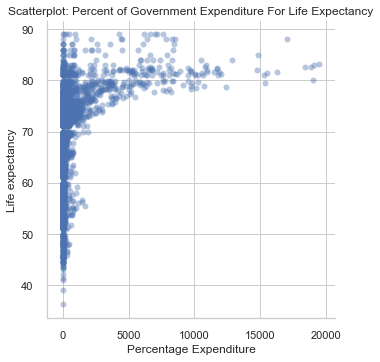

In [35]:
#2 Continous vs Continous
g = sns.lmplot(y='Life expectancy ', # Variable 1.
               x='percentage expenditure', # Variable 2.
               data=life_df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Life expectancy")
g.set_xlabels("Percentage Expenditure")
plt.title('Scatterplot: Percent of Government Expenditure For Life Expectancy')
plt.show()

In [36]:
!conda install -c pyviz hvplot -y

Solving environment: done

# All requested packages already installed.



### 3: Continuous vs. Continuous: "Regression: Life Expectancy with Percentage Expenditure"

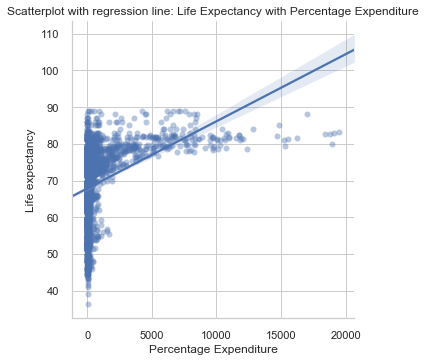

In [37]:
g = sns.lmplot(y='Life expectancy ', 
               x='percentage expenditure',
               data=life_df, # Data
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Life expectancy")
g.set_xlabels("Percentage Expenditure")
plt.title('Scatterplot with regression line: Life Expectancy with Percentage Expenditure')
plt.show()

### 4. Categorical vs. Continuous: "Life Expectancy Per Country"

In [39]:
import hvplot.pandas

In [40]:
#Type 1
life_df.hvplot(kind='scatter', y="Life expectancy ", x="Country")

:Scatter   [Country]   (Life expectancy )

In [41]:
#Type 2
life_df.hvplot.box('Life expectancy ', by="Country", rot=90, height=800, width=1200)

:BoxWhisker   [Country]   (Life expectancy )

In [43]:
life_df.Status

0       Developing
1       Developing
2       Developing
3       Developing
4       Developing
           ...    
2933    Developing
2934    Developing
2935    Developing
2936    Developing
2937    Developing
Name: Status, Length: 2938, dtype: object